# **Layer Explaination**

In [1]:
import tensorflow as tf

In [2]:
# GPU메모리 제한
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


## **Input Image**
Input으로 들어갈 DataSet을 들여다보면서 시각화까지

패키지 로드
- os
- glob
- matplotlib

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from tensorflow.keras import datasets

(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [5]:
image = train_x[0]

이미지 확인

In [6]:
image.shape

(28, 28)

차원 수 확인 결과

[batch_size. height, width, channel]

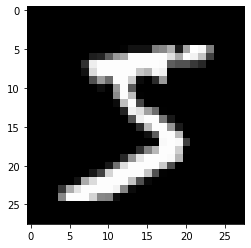

In [7]:
plt.imshow(image, 'gray')
plt.show()

In [8]:
image= image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

# **Feature Extaction**

## **Convolution**

- filters: layer에서 나갈 때 몇 개의 filter를 만들 것인지 (a.k.a weights, filters, channels)
- kernel_size: filter(Weight)의 사이즈
- strides: 몇 개의 pixel을 skip 하면서 흝어지나갈 것인지 (사이즈에도 영향을 줌)
- padding: zero padding을 만들 것인지. VALID는 Padding이 없고, SAME은 Padding이 있음(사이즈애도 영향을 줌)
- activation: Activation Function을 만들것인지. 당장 설정 안해도 Layer층을 따로 만들 수 있음

In [9]:
tf.keras.layers.Conv2D(filters=3, kernel_size=(3, 3), strides=(1, 1), padding='SAME', activation = 'relu')

(3, 3) 대신에 3으로도 대체 가능

In [10]:
tf.keras.layers.Conv2D(3, 3, 1, 'SAME')

## **Visualization**
 - tf.keras.layers.Conv2D

In [11]:
image = tf.cast(image, dtype = tf.float32)
image.dtype

tf.float32

In [12]:
layer =tf.keras.layers.Conv2D(5, 3, 1, padding = 'SAME')
layer

In [13]:
output = layer(image)

In [14]:
import numpy as np
np.min(image), np.max(image)

(0.0, 255.0)

In [15]:
np.min(output), np.max(output)

(-187.59636, 281.9173)

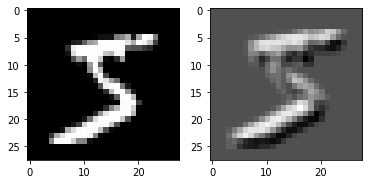

In [16]:
plt.subplot(1,2 ,1)
plt.imshow(image[0,:,:,0], 'gray')
plt.subplot(1,2,2)
plt.imshow(output[0, :, :, 0], "gray")
plt.show()

weight 불러오기
- layer.get_weights()

In [17]:
weight = layer.get_weights()

In [18]:
weight[0].shape, weight[1].shape

((3, 3, 1, 5), (5,))

<function matplotlib.pyplot.show(*args, **kw)>

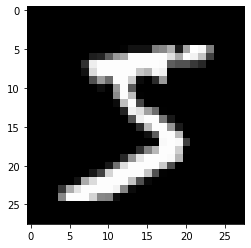

In [19]:
plt.imshow(image[0,:, :, 0], 'gray')
plt.show

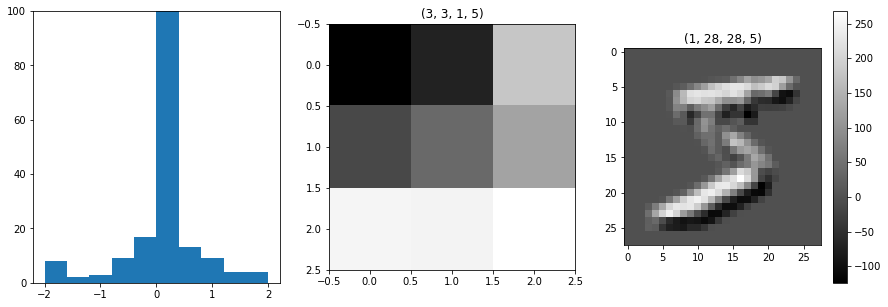

In [20]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range = [-2, 2])
plt.ylim(0,100)
plt.subplot(132)
plt.title(weight[0].shape)
plt.imshow(weight[0][:,:,0,0], 'gray')
plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0,:,:,0], 'gray')
plt.colorbar()
plt.show()

In [21]:
import numpy as np

In [22]:
np.min(output), np.max(output)

(-187.59636, 281.9173)

## **Activation Function**
 - relu : 0미만은 0으로 바꿔줌

In [23]:
tf.keras.layers.ReLU()

In [24]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)

In [25]:
output.shape

TensorShape([1, 28, 28, 5])

In [26]:
np.min(act_output), np.max(act_output)

(0.0, 281.9173)

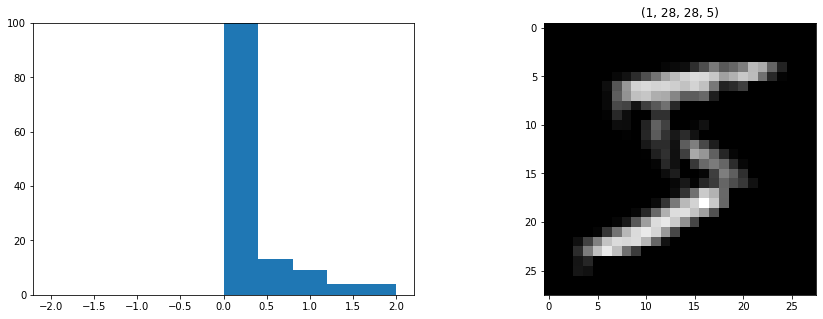

In [27]:
plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.hist(act_output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)

# 필터를 걸친 결과(ReLU 활성함수 적용)
plt.subplot(122)
plt.title(act_output.shape)
plt.imshow(act_output[0, :, :, 0], 'gray')
plt.show()

## **Pooling**
- 이미지 필터에 강조된 부분만 적용해서 압축시킴

- tf.keras.layers.MaxPool2D

In [28]:
tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides = (2, 2,), padding = 'SAME')

In [29]:
pool_layer =tf.keras.layers.MaxPool2D(pool_size=(2,2), strides =(2, 2), padding='SAME')
pool_output = pool_layer(act_output)

In [30]:
act_output.shape

TensorShape([1, 28, 28, 5])

In [31]:
pool_output.shape

TensorShape([1, 14, 14, 5])

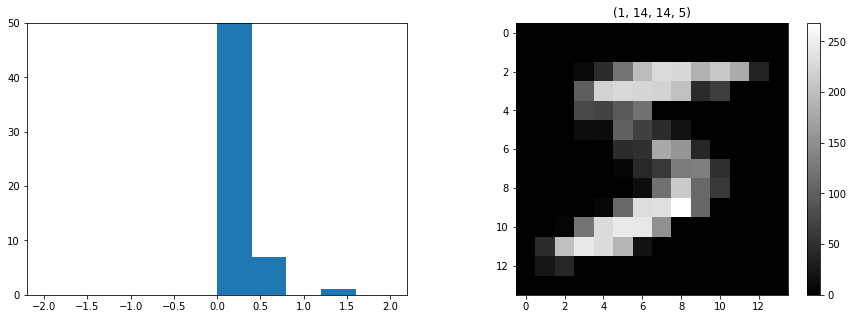

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(pool_output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 50)

plt.subplot(122)
plt.title(pool_output.shape)
plt.imshow(pool_output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

## **Fully Connected**

y = WX + b

## **Flatten**

- tf.kera.layers.Flatten()

In [33]:
import tensorflow as tf

In [34]:
tf.keras.layers.Flatten()

In [35]:
layer = tf.keras.layers.Flatten()

In [36]:
flatten = layer(output)

In [37]:
output.shape

TensorShape([1, 28, 28, 5])

In [38]:
flatten.shape

TensorShape([1, 3920])

In [39]:
28 * 28 * 5

3920

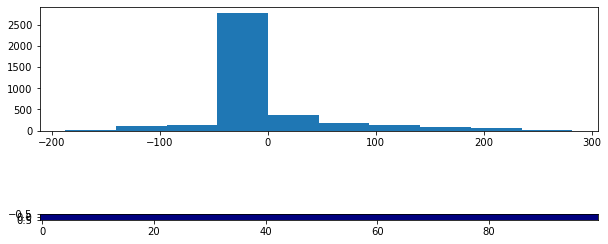

In [42]:
plt.figure(figsize = (10, 5))
plt.subplot(211)
plt.hist(flatten.numpy().ravel())
plt.subplot(212)
plt.imshow(flatten[:, :100], 'jet')
plt.show()

## **Dense**
- tf.keras.layers.Dense

In [44]:
tf.keras.layers.Dense(32, activation = 'relu')

In [45]:
layer = tf.keras.layers.Dense(32, activation= 'relu')

In [47]:
output = layer(flatten)

In [48]:
output.shape

TensorShape([1, 32])

In [49]:
layer_2 = tf.keras.layers.Dense(10, activation = 'relu')
output_example = layer_2(output)

In [51]:
output_example.shape

TensorShape([1, 10])

## **DropOut**

- tf.keras.layers.Dropout

In [52]:
layer = tf.keras.layers.Dropout(0.7)
output = layer(output)

In [53]:
output.shape

TensorShape([1, 32])

## **Build Model**

In [54]:
from tensorflow.keras import layers

In [55]:
input_shape = (28, 28, 1)
num_classes = 10

In [60]:
inputs = layers.Input(shape = input_shape)

# Feature Extraction
net = layers.Conv2D(32, 3, padding = 'SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, 3, padding = 'SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64, 3, padding = 'SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, 3, padding = 'SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2, 2))(net)
net = layers.Dropout(0.25)(net)

# Fully Connected
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)
net = layers.Dense(10)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs = inputs, outputs= net, name = "Basic_CNN")

In [61]:
model

In [62]:
model.summary()

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0 